In [2]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [3]:
%run _libraries.ipynb

In [10]:
%run _functions.ipynb

In [5]:
save_files = 'files/Section5-Residuals-prediction'

In [6]:
save_img = 'docs/img/Section5-Residuals-prediction'

In [7]:
session_name = 'Section5-Residuals-prediction'

# Section V. Residuals prediction

## Load Saved Section if exists

## Load Data

In [ ]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section3-Feature-selection-and-Preprocessing')
estimators_dict = loadit(
    'estimators_dict', dir='Section4-Linear-models-research')
features_dict = loadit(
    'features_dict', dir='Section4-Linear-models-research')
# datasets
train = datasets_dict['train'].copy()
train_cv = datasets_dict['train_cv'].copy()
# models
lr = estimators_dict['lr']
# features
features = features_dict['features'].copy()
features_linear = features_dict['features_linear'].copy()
numeric = features_dict['numeric'].copy()
categorical = features_dict['categorical'].copy()
categorical_transform = features_dict['categorical_transform'].copy()
factor = features_dict['factor'].copy()
target = 'residuals'

## Calculate Residuals

In [ ]:
y_pred_lr = lr.predict(train[features_linear])

In [ ]:
residuals = train['price'] - y_pred_lr

In [ ]:
train['price_pred_lr'] = y_pred_lr
train['residuals'] = residuals

train_cv['price_pred_lr'] = y_pred_lr
train_cv['residuals'] = residuals

train = train.drop('price', axis=1)
train_cv = train_cv.drop('price', axis=1)

In [ ]:
features.append('price_pred_lr')

## Datasets

In [ ]:
train.head()

In [ ]:
train_cv.head()

In [ ]:
datasets = [
    train[features],
    train[target]
]

datasets_cv = [
    train_cv[features],
    train_cv[target]
]

## Preprocessing Pipelines

In [ ]:
encoder = OrdinalEncoder(
    encoding_method='ordered',
    variables=categorical_transform,
    missing_values='ignore',
    unseen='encode'
)

In [ ]:
scaler = StandardScaler()

In [ ]:
preprocessor = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
])

In [ ]:
preprocessor

In [ ]:
n_folds = 20

In [ ]:
params_knn = {
    'estimator__n_neighbors': [2, 3, 4, 5, 7, 10, 15],
    'estimator__weights': ['uniform']
}

In [ ]:
params_svr = {
    'estimator__kernel': ['linear'],
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.01, 0.1]
}

In [ ]:
params_rf = {
    'estimator__n_estimators': [25, 50, 75, 100],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed]
}

In [ ]:
params_bag = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__random_state':[seed]
}

In [ ]:
params_lgb = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__num_leaves': [3, 25, 100, ],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__random_state':[seed],
    'estimator__verbose': [-1]
}

In [ ]:
params_hgb = {
    'estimator__loss': ['squared_error'],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__max_iter': [100, 200, 300],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed]
}

In [ ]:
params_xgb = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed],
    'estimator__learning_rate': [0.1, 0.3],
}

In [ ]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', KNeighborsRegressor())
])

In [ ]:
pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', SVR())
])

In [ ]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor())
])

In [ ]:
pipeline_bag = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', BaggingRegressor())
])

In [ ]:
pipeline_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', LGBMRegressor())
])

In [ ]:
pipeline_hgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', HistGradientBoostingRegressor())
])

In [ ]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', XGBRegressor())
])

In [ ]:
models_list = [
    'KNN', 'SVR', 'RF', 'Bagging',
    'LGBoost', 'HGBoost', 'XGBoost'
]

In [ ]:
estimators_list = [
    pipeline_knn, pipeline_svr, pipeline_rf, pipeline_bag,
    pipeline_lgb, pipeline_hgb, pipeline_xgb
]

In [ ]:
params_list = [
    params_knn, params_svr, params_rf, params_bag,
    params_lgb, params_hgb, params_xgb
]

##  Hyperparameters tuning

In [ ]:
st = stopwatch.start()
results_grid, cv_dict = models_evaluation(
    X=train_cv[features],
    y=train_cv[target],
    names=models_list,
    estimators=estimators_list,
    parameters=params_list,
    n_folds=n_folds,
    full_results=True
)
print(f'Execution time: {stopwatch.stop(st)}')

In [ ]:
results_grid

In [ ]:
results_estimators = results_grid['BestEstimator'].map(lambda x: x.named_steps['estimator']).tolist()

In [ ]:
fig = plt.figure(figsize=(7,3))
sns.barplot(
    x=results_grid['Model'],
    y=results_grid['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_grid['Model'],
    y=results_grid['FitTime'],
    yerr=results_grid['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.xlabel(str.upper('model'))
plt.ylabel(str.upper('fit time'))
plt.title('Fit time: residuals estimators')
plt.xticks(fontsize=9)

## Features Importance

In [ ]:
params_best_dict = {i:{} for i in results_grid['Model']}
for model in results_grid['Model']:
    loc = (results_grid['Model'] == model, 'BestEstimator')
    est = results_grid.loc[loc].item().named_steps['estimator']
    params_best_dict[model] = est.get_params()

In [ ]:
%%capture
estimator_knn = KNeighborsRegressor(**params_best_dict['KNN'])
estimator_svr = SVR(**params_best_dict['SVR'])
estimator_rf = RandomForestRegressor(**params_best_dict['RF'])
estimator_bag = BaggingRegressor(**params_best_dict['Bagging'])
estimator_lgb = LGBMRegressor(**params_best_dict['LGBoost'])
estimator_hgb = HistGradientBoostingRegressor(**params_best_dict['HGBoost'])
estimator_xgb = XGBRegressor(**params_best_dict['XGBoost'])

In [ ]:
estimators_list_best = [
    estimator_knn, estimator_svr,
    estimator_rf, estimator_bag,
    estimator_lgb, estimator_hgb, estimator_xgb
]
for est in estimators_list_best:
    est.fit(*datasets)

In [ ]:
rf_importance = feature_importance_display(
    features=estimator_rf.feature_names_in_,
    importance=estimator_rf.feature_importances_,
    top=10,
    only_features=True
)
bag_importance_calc = np.mean([tree.feature_importances_ for 
                        tree in estimator_bag.estimators_], axis=0)
bag_importance = feature_importance_display(
    features=estimator_bag.feature_names_in_,
    importance=bag_importance_calc,
    top=10,
    only_features=True
)
xgb_importance = feature_importance_display(
    features=estimator_xgb.feature_names_in_,
    importance=estimator_xgb.feature_importances_,
    top=10,
    only_features=True
)

lgb_importance = feature_importance_display(
    features=estimator_lgb.feature_name_,
    importance=estimator_lgb.feature_importances_,
    top=10,
    only_features=True
)
importance_list = [rf_importance, bag_importance, lgb_importance, xgb_importance]
importance_names = list(np.array(models_list)[[2,3,4,6]])
importances = pd.concat(importance_list, keys=importance_names, axis=1)

In [ ]:
importances

In [ ]:
features_imp, freq = np.unique(importances.values.ravel(), return_counts=True)
features_importance_freq = pd.DataFrame({
    'Features': features_imp,
    'Frequency': freq
})
features_importance_freq = \
    features_importance_freq.sort_values('Frequency', ascending=False)
features_importance_freq.reset_index(drop=True, inplace=True)

In [ ]:
features_importance_freq

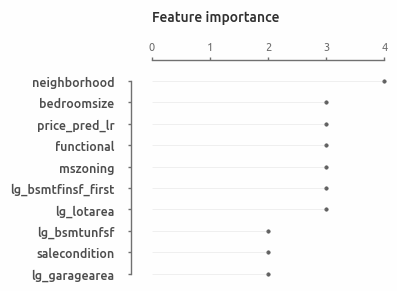

Images 'features_importance.png' and 'features_importance.svg' successfully saved into 'docs/img/Section5-Residuals-prediction' directory


In [11]:
fig = plot_bar_horizontal(
    values=features_importance_freq['Frequency'][:10],
    labels=features_importance_freq['Features'][:10],
    labelsize=9,
    labelcolor='0.3',
    figsize=(3, 2.5),
    kind='lol',
    x_lim_right=4
)
savefig('features_importance', save_img)

## Voting And Stacking estimators

In [ ]:
estimator_knn = KNeighborsRegressor(**params_best_dict['KNN'])
estimator_svr = SVR(**params_best_dict['SVR'])
estimator_rf = RandomForestRegressor(**params_best_dict['RF'])
estimator_bag = BaggingRegressor(**params_best_dict['Bagging'])
estimator_lgb = LGBMRegressor(**params_best_dict['LGBoost'])
estimator_hgb = HistGradientBoostingRegressor(**params_best_dict['HGBoost'])
estimator_xgb = XGBRegressor(**params_best_dict['XGBoost'])

### Voting Regressor 

In [ ]:
estimators = [
    ('SVR', estimator_svr),
    ('RF', estimator_rf),
    ('Bagging', estimator_bag),
    ('LGBoost', estimator_lgb),
    ('HGBoost', estimator_hgb),
    ('XGBoost', estimator_xgb)
]

In [ ]:
estimator_vote = VotingRegressor(estimators=estimators)

In [ ]:
estimator_vote

In [ ]:
pipeline_vote = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('vote', estimator_vote)
])

In [ ]:
st = stopwatch.start()
estimator_vote_cv = cross_validate(
    pipeline_vote, *datasets_cv, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

In [ ]:
estimator_vote_scores_mean = np.mean(estimator_vote_cv['test_score'])

In [ ]:
estimator_vote_scores_mean

In [ ]:
estimator_vote_scores_std = np.std(estimator_vote_cv['test_score'], ddof=1)

In [ ]:
estimator_vote_scores_std

In [ ]:
estimator_vote_fit_time_mean = np.mean(estimator_vote_cv['fit_time'])

In [ ]:
estimator_vote_fit_time_mean

In [ ]:
estimator_vote_fit_time_std = np.std(estimator_vote_cv['fit_time'], ddof=1)

In [ ]:
estimator_vote_fit_time_std

### Stacking Regressor

In [ ]:
estimators = [
    ('SVR', estimator_svr),
    ('RF', estimator_rf),
    ('Bagging', estimator_bag),
    ('LGBoost', estimator_lgb),
    ('HGBoost', estimator_hgb),
    ('XGBoost', estimator_xgb)
]

In [ ]:
final_estimator = RidgeCV()

In [ ]:
estimator_stack = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [ ]:
estimator_stack

In [ ]:
pipeline_stack = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('stack', estimator_stack)
])

In [ ]:
st = stopwatch.start()
estimator_stack_cv = cross_validate(
    pipeline_stack, *datasets_cv, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

In [ ]:
estimator_stack_scores_mean = np.mean(estimator_stack_cv['test_score'])

In [ ]:
estimator_stack_scores_mean

In [ ]:
estimator_stack_scores_std = np.std(estimator_stack_cv['test_score'], ddof=1)

In [ ]:
estimator_stack_scores_std

In [ ]:
estimator_stack_fit_time_mean = np.mean(estimator_stack_cv['fit_time'])

In [ ]:
estimator_stack_fit_time_mean

In [ ]:
estimator_stack_fit_time_std = np.std(estimator_stack_cv['fit_time'], ddof=1)

In [ ]:
estimator_stack_fit_time_std

### Compare estimators

In [ ]:
xticks = np.arange(0, len(estimator_stack_cv['test_score']), 1)
label_vote = 'Vote Regressor'
label_stack = 'Stack Regressor'

delta = estimator_stack_cv['test_score'] - estimator_vote_cv['test_score']
delta_stack = [i if i>0 else 0 for i in delta]
delta_vote = [i if i<0 else 0 for i in delta]

In [ ]:
plot_vote_stack1 = pd.DataFrame(
    data=estimator_vote_cv['test_score'],
    columns=['Voting']
)
plot_vote_stack2 = pd.DataFrame(
    data=estimator_stack_cv['test_score'],
    columns=['Stacking']
)
plot_vote_stack = pd.concat([plot_vote_stack1, plot_vote_stack2], axis=1)

In [ ]:
plot_vote_stack.head()

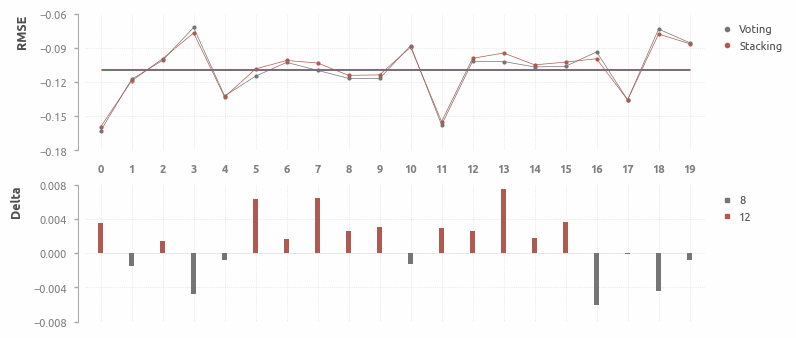

Images 'vote_stack_compare.png' and 'vote_stack_compare.svg' successfully saved into 'docs/img/Section5-Residuals-prediction' directory


In [12]:
fig = plot_estimators_comparing(
    data=plot_vote_stack,
    labels=['Voting', 'Stacking'],
    ylabels=['RMSE', 'Delta'],
    figsize=(8, 4),
    width=0.15,
    palette=[alpha_color(palette[0], 0.85), palette[1]],
    ax0_y_ticks=[-0.18, -0.06, 0.03],
    ax1_y_ticks=[-0.0080, 0.0080, 0.0040]
)

savefig('vote_stack_compare', save_img)

In [ ]:
# create df with results
results_full_cols = [
    'Model', 'MeanScore', 'StdScore', 'FitTime', 'StdFitTime'
]	
results_full = results_grid[results_full_cols].copy()
results_full['MeanScore'] = results_full['MeanScore'].abs() 
results_full['Estimator'] = results_estimators 

In [ ]:
# add scores of vote and stacking regressors
vote_row = [
    'Voting',
    np.abs(estimator_vote_scores_mean),
    estimator_vote_scores_std,
    estimator_vote_fit_time_mean,
    estimator_vote_fit_time_std,
    estimator_vote
]
stack_row = [
    'Stacking',
    np.abs(estimator_stack_scores_mean),
    estimator_stack_scores_std,
    estimator_stack_fit_time_mean,
    estimator_stack_fit_time_std,
    estimator_stack
]

In [ ]:
results_full.loc[len(results_full)] = vote_row
results_full.loc[len(results_full)] = stack_row

results_full = results_full.sort_values('MeanScore', ascending=True)
results_full = results_full.reset_index(drop=True)

In [ ]:
# calculate CI and margin of errors
results_full['CiMin'] = results_full.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['min'],
    axis=1)

results_full['CiMax'] = results_full.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['max'],
    axis=1)

results_full['MarginOfError'] = results_full.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['margin'],
    axis=1)

# move 'Estimator' column to last position
old_cols = results_full.columns
new_cols = [col for col in old_cols if col != 'Estimator'] + ['Estimator']
results_full = results_full[new_cols].copy()

In [ ]:
results_full

In [ ]:
plt.hist(estimator_stack_cv['test_score'], bins=20, alpha=0.85);

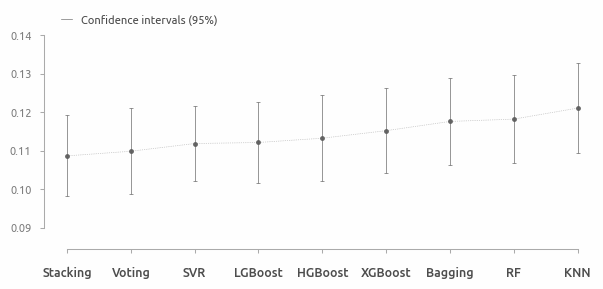

Images 'final_plot.png' and 'final_plot.svg' successfully saved into 'docs/img/Section5-Residuals-prediction' directory


In [13]:
fig = plt.figure(figsize=(7, 2.5))

plt.errorbar(
    x=results_full['Model'],
    y=results_full['MeanScore'],
    yerr=results_full['MarginOfError'],
    elinewidth=0.5,
    capsize=1.2,
    capthick=0.5,
    fmt='o',
    markersize=2.5,
    linestyle='none',
    alpha=0.9,
    label='Confidence intervals (95%)'
)
plt.plot(
    results_full['Model'], results_full['MeanScore'],
    color=palette[0], lw=0.5, ls=':', alpha=0.5
)
axis_rstyle(
    offset_bottom=15,
    xticks=[0, 8, 1],
    yticks=[0.090, 0.140, 0.010],
    xlim=[-0.25, 8.25]
    
)
plt.tick_params(axis='x', pad=10)
plt.xticks(weight='medium', fontsize=9, color='0.3')
# plt.title('Comparing models after hyperparameters tuning (CI, 95%)')
plt.legend(**legend_inline(), **legend_create_handles(1, lw=0.5, alpha=0.85))
plt.grid(False)
plt.show()

savefig('final_plot', save_img)

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(
    x=results_full['Model'],
    y=results_full['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_full['Model'],
    y=results_full['FitTime'],
    yerr=results_full['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.show()

### Save Data

In [ ]:
estimator_stack = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [ ]:
estimator_stack

In [ ]:
estimators_dict['stack_resid'] = estimator_stack

In [ ]:
saveit(estimators_dict, 'estimators_dict', save_files)

In [ ]:
saveit(results_grid, 'results_grid', save_files)

In [ ]:
saveit(results_full, 'results_full', save_files)

### Save Session

In [14]:
save_session(session_name)

### Execution time

In [ ]:
print(f'Execution time: {stopwatch.stop(start)}')